# Credit Card Fraud Detection - Support Vecror Machine

Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

It contains only numerical input variables which are the result of a PCA transformation. The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature '**Time**' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature '**Amount**' is the transaction Amount. 

Feature '**Class**' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
data = pd.read_csv('creditcard.csv')

In [78]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<AxesSubplot:xlabel='Time', ylabel='Amount'>

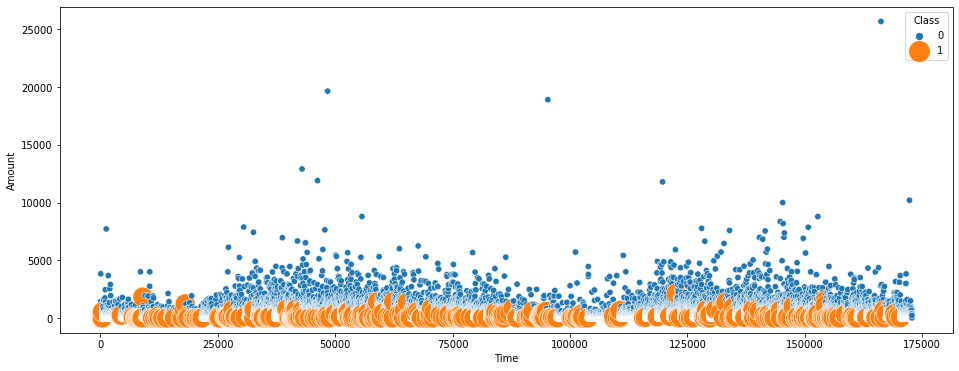

In [4]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=data, x='Time', y='Amount', hue='Class', size="Class", sizes=(400, 40))

<AxesSubplot:xlabel='Time', ylabel='Amount'>

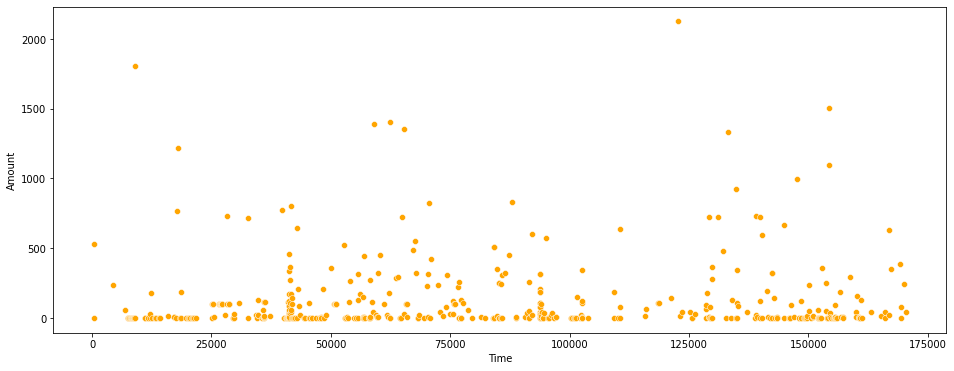

In [21]:
#lets plot only the time and amount of fraud class
plt.figure(figsize=(16,6))
sns.scatterplot(data=data[data['Class']==1], x='Time', y='Amount', color='orange')

In [7]:
data[data['Class']==1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Our understanding from the above plot is that:
- Most of frauds are small amount (50% less that 10)
- No specific pattern between time and frequency of the fraud

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

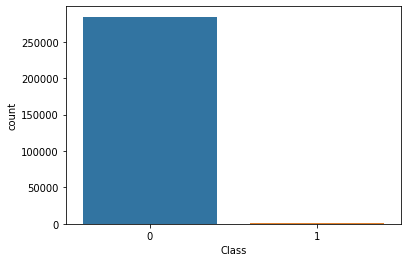

In [ ]:
#let's visualize the class attribute
sns.countplot(data['Class'])

As seen, the dataset is highly **imblanced** and we need to apply a sampling technique for our classification task.

```markdown
Degree of imbalance  | Proportion of Minority Class
---------------------|-----------------------------
Mild                 | 20-40% of the dataset
Moderate             | 1-20% of the dataset
Extreme              | < 1% of the dataset
```

To handle this issue, we will perform **random undersampling** method from imlearn library.

# Training and Prediction

In [22]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
X = data.drop(['Time','Class'],axis=1)
y = data['Class']

In [37]:
#undersampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

In [38]:
y_res.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=101)

In [40]:
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [41]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[135  12]
 [ 39 110]]


              precision    recall  f1-score   support

           0       0.78      0.92      0.84       147
           1       0.90      0.74      0.81       149

    accuracy                           0.83       296
   macro avg       0.84      0.83      0.83       296
weighted avg       0.84      0.83      0.83       296



The model performance isn't same for both class. We need to adjust its parameters (it may also help to normalize the data).

# *List of SVC model parameters*:

(**C**=1.0, **kernel**='rbf', **degree**=3, **gamma**='scale', **coef0**=0.0, **shrinking**=True, **probability**=False, **tol**=0.001, **cache_size**=200, **class_weight**=None, **verbose**=False, **max_iter**=-1, **decision_function_shape**='ovr', **break_ties**=False, **random_state**=None)

We can search for parameters using a **GridSearch**. We will search for two  parameters C and gamma values:
- **C**: is a hypermeter in SVM to control error
- **Gamma**: decides that how much curvature we want in a decision boundary. Gamma is used when we use the Gaussian RBF kernel. if you use linear or polynomial kernel then you do not need gamma only you need C hypermeter.

This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [42]:
from sklearn.model_selection import GridSearchCV
#The CV stands for cross-validation 

In [43]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [44]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [45]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.565 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.565 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.584 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.870 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [46]:
grid.best_estimator_

SVC(C=100, gamma=0.0001)

In [47]:
grid_predictions = grid.predict(X_test)

In [49]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[141   6]
 [ 16 133]]


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       147
           1       0.96      0.89      0.92       149

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



As seen the accuracy improved from 83 to 93. Additionally the recall for class 1 improved as well (from 73 to 89)

# Train another model after normalizing data

Let's also normalize the 'Amount' attribute to cheak how it will affect the perfornance.

In [65]:
#normalizing 'Amount' feature to be in range(0,1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(X_test)

In [75]:
model_scaled = SVC(C=100, gamma=0.1) #after another gridsearch these values were the best
model_scaled.fit(x_train_scaled,y_train)
preds = model_scaled.predict(x_test_scaled)

In [76]:
print(confusion_matrix(y_test,preds))
print('\n')
print(classification_report(y_test,preds))

[[147   0]
 [ 19 130]]


              precision    recall  f1-score   support

           0       0.89      1.00      0.94       147
           1       1.00      0.87      0.93       149

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



The difference isn't significant. However 94% accuracy is good :)